# Connecting or Mounting the Drive to the Google Colab


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Unzipping the dataset folder

In [2]:
!unzip /content/drive/My\ Drive/Tomato\ Leaf\ Detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (102).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (103).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (104).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (105).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (106).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (107).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (108).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (109).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (11).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (110).JPG  
  inflating: Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (111).JPG  
  inflating: Research Data

# Loading the Data into System

In [61]:
DATASET_DIR='/content/Research Dataset/'


# Glob will be useful for retreiving the internal paths where I have to total of 10 classes which is displayed in the output.
from glob import glob
Tomato_Leaf_Diseases_Train = glob('/content/Research Dataset/Train/*')
Tomato_Leaf_Diseases_Train

['/content/Research Dataset/Train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/Research Dataset/Train/Tomato___Bacterial_spot',
 '/content/Research Dataset/Train/Tomato___healthy',
 '/content/Research Dataset/Train/Tomato___Septoria_leaf_spot',
 '/content/Research Dataset/Train/Tomato___Target_Spot',
 '/content/Research Dataset/Train/Tomato__Yellow_Leaf_Curl_Virus',
 '/content/Research Dataset/Train/Tomato___Early_blight',
 '/content/Research Dataset/Train/Tomato___Leaf_Mold',
 '/content/Research Dataset/Train/Tomato___Late_blight',
 '/content/Research Dataset/Train/Tomato___Tomato_mosaic_virus']

In [62]:
#This is to display all the infomration of Test folder

Tomato_Leaf_Diseases_Test = glob('/content/Research Dataset/Test/*')
Tomato_Leaf_Diseases_Test

['/content/Research Dataset/Test/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/Research Dataset/Test/Tomato___Bacterial_spot',
 '/content/Research Dataset/Test/Tomato___healthy',
 '/content/Research Dataset/Test/Tomato___Septoria_leaf_spot',
 '/content/Research Dataset/Test/Tomato___Target_Spot',
 '/content/Research Dataset/Test/Tomato__Yellow_Leaf_Curl_Virus',
 '/content/Research Dataset/Test/Tomato___Early_blight',
 '/content/Research Dataset/Test/Tomato___Leaf_Mold',
 '/content/Research Dataset/Test/Tomato___Late_blight',
 '/content/Research Dataset/Test/Tomato___Tomato_mosaic_virus']

#Loading the Required Packages for the Model

In [63]:
import os
import cv2
import scipy.io
%matplotlib inline
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from glob import glob
from tqdm import tqdm
from skimage import data
from keras.models import Model
from keras import regularizers
from skimage.io import imread
from keras.layers import Dropout
from skimage.color import rgb2gray
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from os.path import dirname, join as pjoin
from sklearn.metrics import confusion_matrix
from keras.applications.mobilenet import MobileNet
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.models import Model,Sequential, Input, load_model

# Exploratory Data Analysis has been performed to understand the Data more easily


In [64]:
#Creating a list for all the classes in the dataset and storing it in the disease types variable

disease_types = ['Tomato___Spider_mites Two-spotted_spider_mite',
                 'Tomato___Early_blight',
                 'Tomato___Leaf_Mold',
                 'Tomato___Tomato_mosaic_virus',
                 'Tomato___Late_blight',
                 'Tomato___healthy',
                 'Tomato___Bacterial_spot',
                 'Tomato___Target_Spot',
                 'Tomato__Yellow_Leaf_Curl_Virus',
                 'Tomato___Septoria_leaf_spot']       

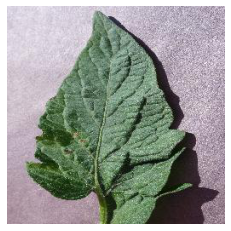

In [65]:
#Reading the Image to present how make sure system understands that the given data is Image Data

from skimage.io import imread
img = imread('/content/Research Dataset/Train/Tomato___Target_Spot/Tomato_Target_spot (104).JPG')

plt.imshow(img)
plt.axis('off')
plt.show()

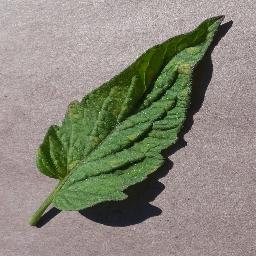

In [66]:
# Printing the Image in other way

from IPython.display import Image, display

Image('/content/Research Dataset/Train/Tomato___Leaf_Mold/Tomato_Leaf_Mold (400).JPG')

In [67]:
# Creating the List Directory to read all the images in 10 different folders

data_set = '/content/Research Dataset'

labels = os.listdir(data_set)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 2
folder: Test images: 10
folder: Train images: 10
Total images: 20


In [68]:
# Printing the Number of images in train class

data_set_train = '/content/Research Dataset/Train'

labels = os.listdir(data_set_train)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set_train):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 10
folder: Tomato___Spider_mites Two-spotted_spider_mite images: 1000
folder: Tomato___Bacterial_spot images: 1000
folder: Tomato___healthy images: 1000
folder: Tomato___Septoria_leaf_spot images: 1000
folder: Tomato___Target_Spot images: 1000
folder: Tomato__Yellow_Leaf_Curl_Virus images: 1000
folder: Tomato___Early_blight images: 1000
folder: Tomato___Leaf_Mold images: 1000
folder: Tomato___Late_blight images: 1000
folder: Tomato___Tomato_mosaic_virus images: 1000
Total images: 10000


In [69]:
# Printing the number of images in test class in each folder

data_set_test = '/content/Research Dataset/Test/'

labels = os.listdir(data_set_test)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set_test):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 10
folder: Tomato___Spider_mites Two-spotted_spider_mite images: 700
folder: Tomato___Bacterial_spot images: 700
folder: Tomato___healthy images: 700
folder: Tomato___Septoria_leaf_spot images: 700
folder: Tomato___Target_Spot images: 700
folder: Tomato__Yellow_Leaf_Curl_Virus images: 700
folder: Tomato___Early_blight images: 700
folder: Tomato___Leaf_Mold images: 700
folder: Tomato___Late_blight images: 700
folder: Tomato___Tomato_mosaic_virus images: 700
Total images: 7000


In [70]:
#Canny edge detection by resizing

default_image_size = tuple((128,128))

def img_to_np(DIR,flatten=True):
    cv_img=mpimg.imread(DIR,0)
    cv_img=cv2.resize(cv_img,default_image_size)
    img = np.uint8(cv_img)
    if(flatten):
        img=img.flatten()
        return img

In [71]:
#Appending all the folders and image files in the dataset for providing the Graphical Representation of Tomato Diseases

TRAIN_DIR="/content/Research Dataset/Train/"

index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
        if index not in data:
            data[index]=[]
        try: 
            data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
        except:
            print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1 

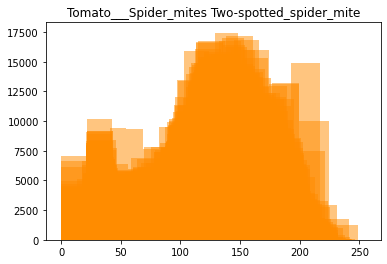

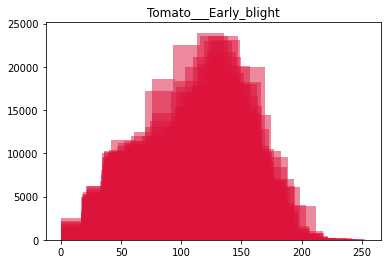

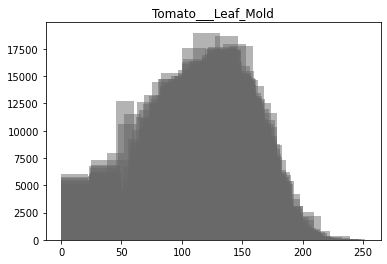

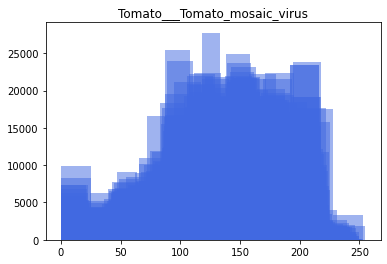

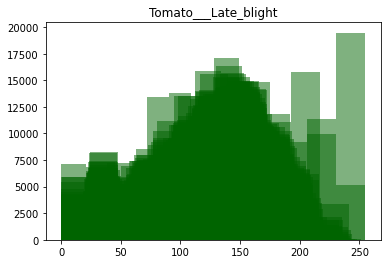

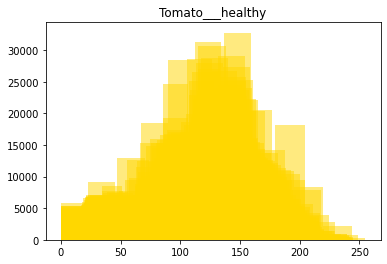

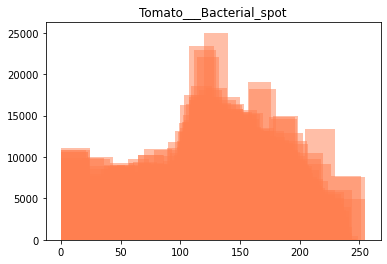

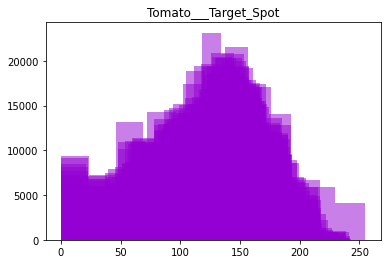

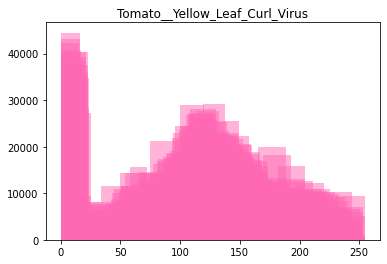

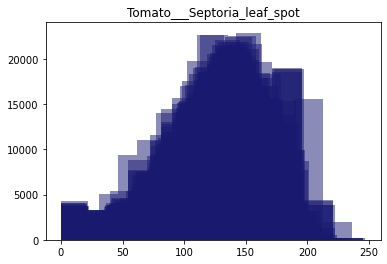

In [17]:
#Declaring the limit size for the graphs 

CLASS_LIMIT=500 
colors=["darkorange","crimson","dimgray","royalblue","darkgreen","gold","coral","darkviolet","hotpink","midnightblue"]
for index_class in range(len(data)):
    index=0
    for arr in data[index_class]:
        plt.hist(arr,color=colors[index_class],alpha=0.5)
        if(index>CLASS_LIMIT):
            plt.title(disease_types[index_class])
            plt.show()
            break
        index=index+1    

In [72]:
#Printing the train data tail values which are stored by the system from the dataset
train_dir='/content/Research Dataset/Train/'

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.tail()

,File,DiseaseID,Disease Type
9995,Tomato___Septoria_leaf_spot/Tomato_Septoria_le...,9,Tomato___Septoria_leaf_spot
9996,Tomato___Septoria_leaf_spot/Tomato_Septoria_le...,9,Tomato___Septoria_leaf_spot
9997,Tomato___Septoria_leaf_spot/Tomato_Septoria_le...,9,Tomato___Septoria_leaf_spot
9998,Tomato___Septoria_leaf_spot/Tomato_Septoria_le...,9,Tomato___Septoria_leaf_spot
9999,Tomato___Septoria_leaf_spot/Tomato_Septoria_le...,9,Tomato___Septoria_leaf_spot


In [73]:
# Displaying the train data head images which are first 5 images reading by the system
# Seed is to randomize the values the value is given as 64 where all the 64 images will be picked by the system randomly out of 10000 images

SEED = 64 
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reseting the indices values
train.head()

,File,DiseaseID,Disease Type
0,Tomato___healthy/Tomato_healthy (687).JPG,5,Tomato___healthy
1,Tomato___Spider_mites Two-spotted_spider_mite/...,0,Tomato___Spider_mites Two-spotted_spider_mite
2,Tomato___Tomato_mosaic_virus/Tomato__mosaic_vi...,3,Tomato___Tomato_mosaic_virus
3,Tomato___Leaf_Mold/Tomato_Leaf_Mold (305).JPG,2,Tomato___Leaf_Mold
4,Tomato___Bacterial_spot/Tomato_Bacterial_spot ...,6,Tomato___Bacterial_spot


In [74]:
# Provides all the information of the Dataset

train.info

<bound method DataFrame.info of                                                    File  ...                                   Disease Type
0             Tomato___healthy/Tomato_healthy (687).JPG  ...                               Tomato___healthy
1     Tomato___Spider_mites Two-spotted_spider_mite/...  ...  Tomato___Spider_mites Two-spotted_spider_mite
2     Tomato___Tomato_mosaic_virus/Tomato__mosaic_vi...  ...                   Tomato___Tomato_mosaic_virus
3         Tomato___Leaf_Mold/Tomato_Leaf_Mold (305).JPG  ...                             Tomato___Leaf_Mold
4     Tomato___Bacterial_spot/Tomato_Bacterial_spot ...  ...                        Tomato___Bacterial_spot
...                                                 ...  ...                                            ...
9995  Tomato___Spider_mites Two-spotted_spider_mite/...  ...  Tomato___Spider_mites Two-spotted_spider_mite
9996  Tomato___Tomato_mosaic_virus/Tomato__mosaic_vi...  ...                   Tomato___Tomato_mosaic_vi

In [75]:
# Colum variables stored in the Model

train.columns

Index(['File', 'DiseaseID', 'Disease Type'], dtype='object')

In [76]:
# Value count for images with the ID generated by the system along with the number of images in each ID

train['DiseaseID'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: DiseaseID, dtype: int64

In [77]:
# Value count for images with the ID generated by the system along with the number of images in each ID

train['Disease Type'].value_counts()

Tomato___Early_blight                            1000
Tomato__Yellow_Leaf_Curl_Virus                   1000
Tomato___Bacterial_spot                          1000
Tomato___Septoria_leaf_spot                      1000
Tomato___Tomato_mosaic_virus                     1000
Tomato___Spider_mites Two-spotted_spider_mite    1000
Tomato___Late_blight                             1000
Tomato___healthy                                 1000
Tomato___Target_Spot                             1000
Tomato___Leaf_Mold                               1000
Name: Disease Type, dtype: int64

In [78]:
# Finding the Data Types for the Files

train.dtypes

File            object
DiseaseID        int64
Disease Type    object
dtype: object

In [79]:
# Count for each file in the model 

train.count()

File            10000
DiseaseID       10000
Disease Type    10000
dtype: int64

In [80]:
# Description for the model

train.describe()

,DiseaseID
count,10000.000000
mean,4.500000
std,2.872425
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [81]:
#Printing the tail values fro the data which are stored by the system from the dataset
test_dir='/content/Research Dataset/Test/'

test_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(test_dir, sp)):
        test_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
test = pd.DataFrame(test_data, columns=['File', 'DiseaseID','Disease Type'])
test.tail()

,File,DiseaseID,Disease Type
6995,Tomato___Septoria_leaf_spot/Tomato___Septoria_...,9,Tomato___Septoria_leaf_spot
6996,Tomato___Septoria_leaf_spot/Tomato___Septoria_...,9,Tomato___Septoria_leaf_spot
6997,Tomato___Septoria_leaf_spot/Tomato___Septoria_...,9,Tomato___Septoria_leaf_spot
6998,Tomato___Septoria_leaf_spot/Tomato___Septoria_...,9,Tomato___Septoria_leaf_spot
6999,Tomato___Septoria_leaf_spot/Tomato___Septoria_...,9,Tomato___Septoria_leaf_spot


In [82]:
# Displaying the head images which are test data first 5 images reading by the system
# Seed is to randomize the values the value is given as 64 where all the 64 images will be picked by the system randomly out of 10000 images

SEED = 64 
test = test.sample(frac=1, random_state=SEED) 
test.index = np.arange(len(test)) # Reseting the indices values
test.head()

,File,DiseaseID,Disease Type
0,Tomato___Late_blight/Tomato___Late_blight (507...,4,Tomato___Late_blight
1,Tomato___Target_Spot/Tomato___Target_Spot (171...,7,Tomato___Target_Spot
2,Tomato___Leaf_Mold/Tomato___Leaf_Mold (521).JPG,2,Tomato___Leaf_Mold
3,Tomato___Septoria_leaf_spot/Tomato___Septoria_...,9,Tomato___Septoria_leaf_spot
4,Tomato___Early_blight/Tomato___Early_blight (1...,1,Tomato___Early_blight


In [83]:
# Provides all the information of the Dataset

test.info

<bound method DataFrame.info of                                                    File  ...                                   Disease Type
0     Tomato___Late_blight/Tomato___Late_blight (507...  ...                           Tomato___Late_blight
1     Tomato___Target_Spot/Tomato___Target_Spot (171...  ...                           Tomato___Target_Spot
2       Tomato___Leaf_Mold/Tomato___Leaf_Mold (521).JPG  ...                             Tomato___Leaf_Mold
3     Tomato___Septoria_leaf_spot/Tomato___Septoria_...  ...                    Tomato___Septoria_leaf_spot
4     Tomato___Early_blight/Tomato___Early_blight (1...  ...                          Tomato___Early_blight
...                                                 ...  ...                                            ...
6995  Tomato___Spider_mites Two-spotted_spider_mite/...  ...  Tomato___Spider_mites Two-spotted_spider_mite
6996  Tomato___Late_blight/Tomato___Late_blight (54)...  ...                           Tomato___Late_bli

In [84]:
# Colum variables stored in the Model

test.columns

Index(['File', 'DiseaseID', 'Disease Type'], dtype='object')

In [85]:
# Value count for images with the ID generated by the system along with the number of images in each ID

train['DiseaseID'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: DiseaseID, dtype: int64

In [86]:
# Value counts for the model with disease name along with the number of diseases

test['Disease Type'].value_counts()

Tomato___Early_blight                            700
Tomato__Yellow_Leaf_Curl_Virus                   700
Tomato___Bacterial_spot                          700
Tomato___Septoria_leaf_spot                      700
Tomato___Tomato_mosaic_virus                     700
Tomato___Spider_mites Two-spotted_spider_mite    700
Tomato___Late_blight                             700
Tomato___healthy                                 700
Tomato___Target_Spot                             700
Tomato___Leaf_Mold                               700
Name: Disease Type, dtype: int64

In [87]:
# Finding the Data Types for the Files

test.dtypes

File            object
DiseaseID        int64
Disease Type    object
dtype: object

In [88]:
# Count for each file in the model 

test.count()

File            7000
DiseaseID       7000
Disease Type    7000
dtype: int64

In [89]:
# Test Description for the model

test.describe()

,DiseaseID
count,7000.000000
mean,4.500000
std,2.872487
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


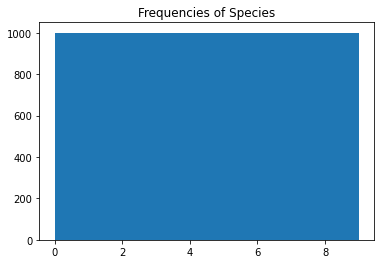

<Figure size 864x864 with 0 Axes>

In [90]:
# Plotting the histogram for Train data
plt.hist(train['DiseaseID'])
plt.title('Frequencies of Species')
plt.figure(figsize=(12, 12))
plt.show()

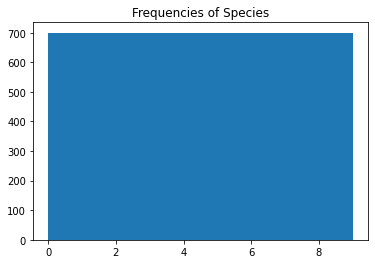

<Figure size 864x864 with 0 Axes>

In [91]:
# Plotting the histogram for Test data
plt.hist(test['DiseaseID'])
plt.title('Frequencies of Species')
plt.figure(figsize=(12, 12))
plt.show()

In [92]:
#Storing the Train path of the dataset

data_dir = '/content/Research Dataset/Train/'

In [93]:
#We are merging the images in all the 12 classes and storing in the new directory

for f in data_dir:
    new_dir = pjoin(data_dir + f) 

In [94]:
new_dir
print('lenght of new_dir:',len(new_dir))

dir = glob('/content/Research Dataset/Train/*/*.JPG')
print('lenght of dir:',len(dir))

dir[1]

lenght of new_dir: 33
lenght of dir: 9932


'/content/Research Dataset/Train/Tomato___Spider_mites Two-spotted_spider_mite/Tomato___Spider_mites Two-spotted_spider_mite (151).JPG'

# Data Augmentation

In [95]:
#This helps in increasing the data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Initializing the Model using Transfer Learning from the ImageNet

In [96]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Research Dataset/Train'
valid_path = '/content/Research Dataset/Test'

# adding the preprocessing layer to the very first layer of MobileNet Model
den = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Image net is the name of the compinetiong where all these models were saved 
# Don't train existing weights
for layer in den.layers:
    layer.trainable = False

In [97]:
# Base layer of the Model
x = Flatten()(den.output)
prediction = Dense(len(Tomato_Leaf_Diseases_Train), activation='softmax',  kernel_regularizer=regularizers.l2(0.0001))(x)  
#Using L2 regularizer to avoid overfitting.

In [98]:
# creating a model object
model = Model(inputs=den.input, outputs=prediction)

# viewing the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [99]:
# Compiling the model with cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [100]:
#Dividing the data for training and testing purpose
training_set = train_datagen.flow_from_directory('/content/Research Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Research Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 7000 images belonging to 10 classes.


In [101]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]   

In [102]:
#Fitting the Model with 50 Epochs

result = model.fit(training_set,
                   validation_data=test_set,
                   epochs=50,
                   steps_per_epoch=len(training_set),
                   validation_steps=len(test_set) ,callbacks=my_callbacks)

Epoch 1/50
313/313 [==============================] - 127s 407ms/step - loss: 2.4051 - accuracy: 0.7813 - val_loss: 2.2042 - val_accuracy: 0.8314
Epoch 2/50
313/313 [==============================] - 130s 416ms/step - loss: 1.1847 - accuracy: 0.8976 - val_loss: 1.5019 - val_accuracy: 0.8891
Epoch 3/50
313/313 [==============================] - 128s 410ms/step - loss: 0.9977 - accuracy: 0.9240 - val_loss: 2.6115 - val_accuracy: 0.8507
Epoch 4/50
313/313 [==============================] - 126s 403ms/step - loss: 1.0281 - accuracy: 0.9289 - val_loss: 2.1211 - val_accuracy: 0.8793


In [103]:
#Calculating the Model Accuracy

print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
219/219 [==============================] - 16s 75ms/step - loss: 2.1211 - accuracy: 0.8793
Test Accuracy: 87.92856931686401


# Model Accuracy and Loss

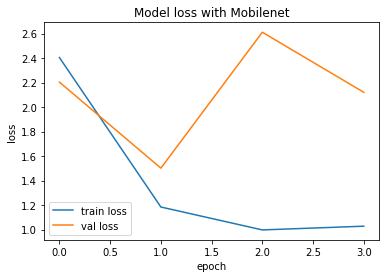

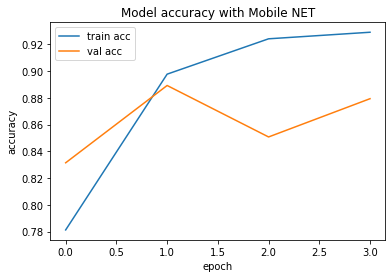

<Figure size 432x288 with 0 Axes>

In [104]:
# loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model loss with Mobilenet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.title('Model accuracy with Mobile NET')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [105]:
# Saving the Model
model.save("mobilenet.h5")

# Predicting the Disease Type using Mobile_NET

In [106]:
from keras.models import load_model

model = load_model('mobilenet.h5')
img = image.load_img('/content/Research Dataset/Test/Tomato___Septoria_leaf_spot/Tomato___Septoria_leaf_spot (105).JPG', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

Tomato Disease predicted by the model is: [[2.1012561e-36 1.4103325e-24 2.0708896e-29 1.3869350e-35 1.4637287e-34
  1.5798016e-28 5.6225227e-14 1.0135548e-19 8.4329869e-33 1.0000000e+00]]


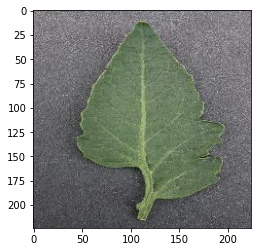

Prediction: Tomato___Septoria_leaf_spot


In [53]:
print('Tomato Disease predicted by the model is:',classes)
show_img=image.load_img('/content/Research Dataset/Test/Tomato___Septoria_leaf_spot/Tomato___Septoria_leaf_spot (105).JPG', grayscale=False, target_size=(224, 224))

plt.imshow(show_img)
plt.show()

a=classes[0]
ind=np.argmax(a)
        
print('Prediction:',disease_types[ind])

# Plotting the Model

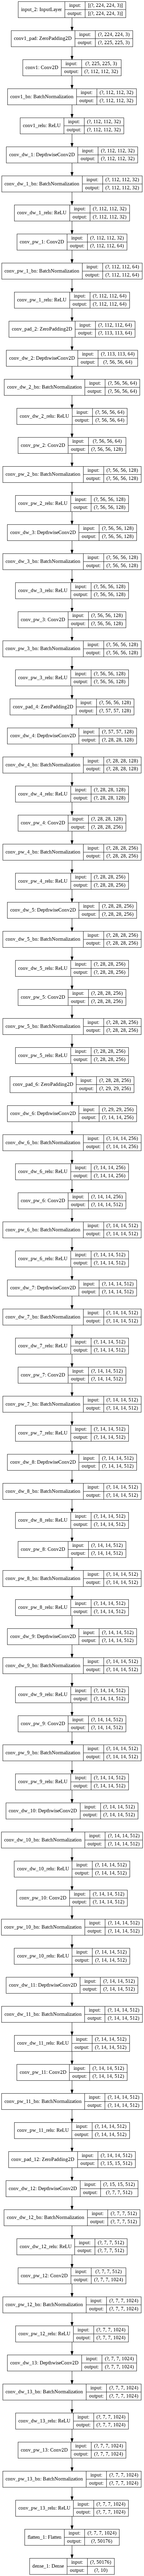

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='Mobile_net.png', show_shapes=True, rankdir='TB', expand_nested=True)

# Evaluation Metrics

In [ ]:
# Making the Confusion Matrix
Y_pred = model.predict(training_set)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(test_set, axis=1)

cm = confusion_matrix(test_set,Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

plt.title('Confusion matrix for Mobile Net', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

print ("Accuracy : ", metrics.accuracy_score(Y_true, Y_pred)*100)

In [ ]:
# Precision
from sklearn.metrics import precision_score

precision_score(Y_true, Y_pred, average=None)

In [ ]:
# Recall

from sklearn.metrics import recall_score
recall_score(Y_true, Y_pred, average=None)

In [ ]:
# F1_score
from sklearn.metrics import f1_score

f1_score(Y_true, Y_pred, average=None)

In [ ]:
from sklearn.metrics import r2_score

r2_score(Y_true, Y_pred)

In [ ]:
#MAE L1 loss function - Should be close to 0

from sklearn.metrics import mean_absolute_error  
mean_absolute_error(Y_true, Y_pred)

In [ ]:
#MAE L2 loss function - Should be close to 0

from sklearn.metrics import mean_squared_error  
mean_squared_error(Y_true, Y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred))

# Thank You